# **01. Neural Network Regression with TensorFlow**
There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

>Predict the selling price of houses given information

>about them (such as number of rooms, size, number of bathrooms).

>Predict the coordinates of a bounding box of an item in an image.

Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).



# **Typical architecture of a regresison neural network**

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.



Hyperparameter:	  Typical value
Input layer shape:	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

>Hidden layer(s):	Problem specific, minimum = 1, maximum = unlimited

>Neurons per hidden layer:	Problem specific, generally 10 to 100

>Output layer shape:	Same shape as desired prediction shape (e.g. 1 for house price)

>Hidden activation:	Usually ReLU (rectified linear unit)

>Output activation:	None, ReLU, logistic/tanh

>Loss function:	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

>Optimizer	SGD (stochastic gradient descent), Adam

# **🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves(nerouns,layers,activation function,...), where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).**

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version of the tf

2.7.0


# **Regression input shapes and output shapes:**
One of the most important concepts when working with neural networks are the input and output shapes.

>The input shape is the shape of your data that goes into the model.

>The output shape is the shape of your data you want to come out of your model.

>These will differ depending on the problem you're working on.

>Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

# **Steps in modelling with TensorFlow:**



**In TensorFlow, there are typically 3 fundamental steps to creating and training a model.**

>**Creating a model: - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).**

>**Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).**

>**Fitting a model - letting the model try to find patterns in the data (how does X get to y).**

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

# Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).



# **HOW TO Improving a model?**

**Adding Layers**

**Increase the number of hidden unites**

**Change the activation functions**

**Change the optimization functions**

**Change the learning rate**

**Fitting on more data**

**fiting for longer**


**all these called hyperparameter tuning + there is lots** 

**of another things we can do but these are the most** 


**importan hyperparameters tuning**






# **Evaluating a model:**
A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model ->** 

**evaulate it -> build (tweak) a model -> evaluate it...**


The tweaking comes from maybe not building a model from 

scratch but adjusting an existing one.

# **It's a good idea to visualize:** Why?

The data - what data are you working with? What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

# **Split data into training/test set:**

**One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).**

*Each set serves a specific purpose:*

**Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).**

**Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).**

**Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).**



***🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.***

In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).**

To do so, we'll use the **get_dummies() method** in pandas.

*It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.*

In [5]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


**Now we'll split data into features (X) and labels (y).**

In [6]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
X.shape , y.shape

((1338, 11), (1338,))

In [9]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [10]:
# Now we can build and fit a model.

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7578.0840 - mae: 7578.0840
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7694.1348 - mae: 7694.1348
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 7595.9121 - mae: 7595.9121
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7735.9106 - mae: 7735.9106

In [12]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6301.6475 - mae: 6301.6475


[6301.6474609375, 6301.6474609375]

# Our model didn't perform very well, let's try a bigger model.

**We'll try 3 things:**

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).

Everything else will stay the same. 

In [13]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])
# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [14]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

Much better! Using a larger model and the Adam optimizer 

results in almost half the error as the previous model.

🔑 **Note:** For many problems, the Adam optimizer is a 
>great starting choice. 

Let's check out the loss curves of our model, we should 

see a downward trend.

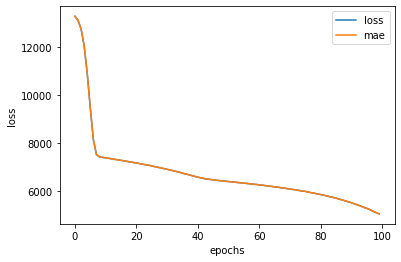

In [15]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

**From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).**

**What this tells us is the loss might go down if we try training it for longer.**

🤔 **Question:** How long should you train for?

**It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.**

**Let's train the same model as above for a little longer. We can do this but calling fit on it again.**

In [16]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3495.8025 - mae: 3495.8025


(3495.802490234375, 3495.802490234375)

 Training for an extra 100 epochs we see about a 25% decrease in error.

**How does the visual look? **

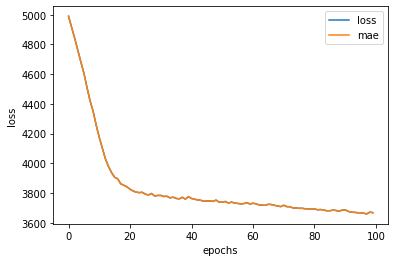

In [18]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

*A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.*

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

*These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).*

*Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:*

**Turning all of your data to numbers (a neural network can't handle strings).**

**Making sure your data is in the right shape (verifying input and output shapes).** 

# [Feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)


**Normalizing data** 

**(making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to **

**as min-max scaling.**

**Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.**


## Which one should you use?

# With neural networks

** you'll tend to favour normalization as they tend to **

>prefer values between 0 and 1 (you'll see this espcially 

>with image processing), however, you'll often find a 

>neural network can perform pretty well with minimal >feature scaling

# 📖 Resource
[Scikit-Learn's documentation on preprocessing data.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)

[Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)


We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [21]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges**

**(to make sure they're all between 0 and 1).**

**To do this, we're going to use a few classes from Scikit-Learn:**

*[make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html)

>[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

>[OneHotEncoder ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


*Let's see them in action.*


In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
#Step 1:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Step2:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Step3:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#step4:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

#Step5:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

**Now we've normalized it and one-hot encoding it, what does our data look like now?**

In [24]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [25]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as insurance_model_2.

In [27]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

Let's evaluate the model on normalized test set.

In [28]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5779 - mae: 3171.5779


In [29]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3495.802490234375, 3171.577880859375)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.